In [3]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)

# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [4]:

# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))


# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

25767


len(all_training_text) 152
len(all_test_text) 142
****************************************************************
len(train_tokens),len(fdist),fdist[0] 216597 18373 ('username', 8321)
len(tokens)for vocab 1566
vocab_size 1567
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_190 (Embedding)    (None, 2248, 100)         156700    
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 2241, 32)          25632     
_________________________________________________________________
max_pooling1d_163 (MaxPoolin (None, 1120, 32)          0         
_________________________________________________________________
flatten_107 (Flatten)        (None, 35840)             0         
_________________________________________________________________
dense_335 (Dense)            (None, 10)                358410    
_______________________________________________

Training Accuracy: 0.9013
Testing Accuracy with embedding_matrix trainable=True:  0.6761
........RNN-LSTM, Word Embeddings without weight..............
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 2248)              0         
_________________________________________________________________
embedding_197 (Embedding)    (None, 2248, 10)          15670     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                19200     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0

KeyboardInterrupt: 

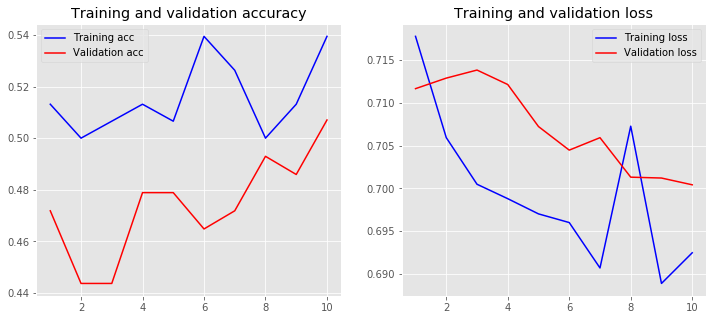

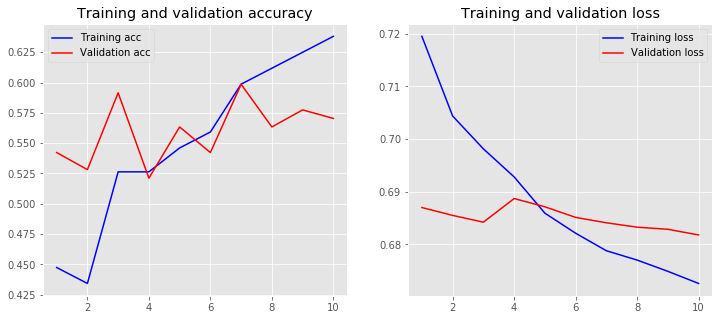

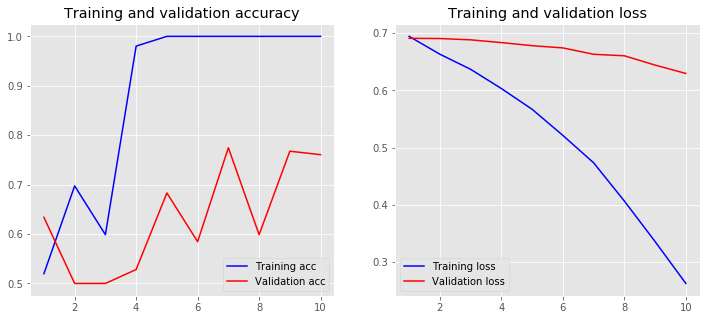

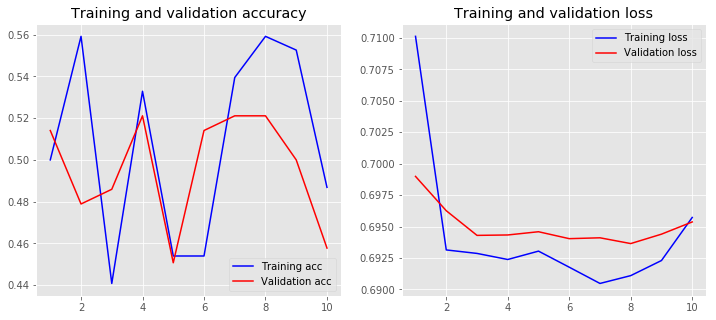

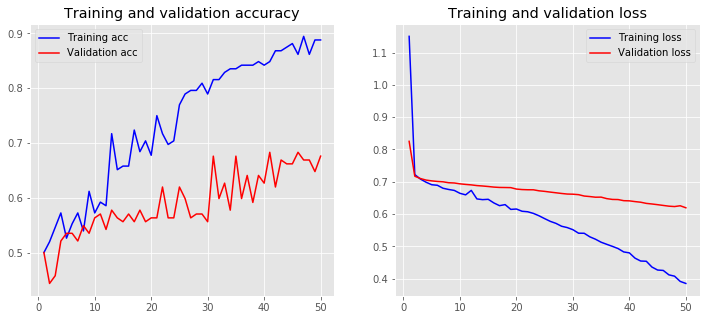

In [82]:
#import sys
#sys.path.append("/anaconda3/lib/python3.7/site-packages")
import numpy as np
import numpy
import nltk
import pickle
import pandas as pd
import glob
import os
import re
import operator
from collections import Counter
#from read_xml_files import *
##from s_stemmer import *
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from itertools import groupby
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xml.etree.ElementTree as ET
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
##from pattern.text.en import singularize
##nltk.download('vader_lexicon')
##nltk.download('punkt')
#import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
##tt = ToktokTokenizer()#keeps the url as is...................................................
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
Porter_stemmer = PorterStemmer()
Lancaster_stemmer = LancasterStemmer()
WordNet_lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
##Train_path="D:/Data/PAN2015-Profiling/pan15-author-profiling-training-dataset-english-2015-04-23"#path for train data
##Test_path="D:/Data/PAN2015-Profiling/pan-ap2015-test/en" #path for test data

##Train_path="D:/NLP/PAN2014/pan14-author-profiling-training-corpus-english-twitter-2014-04-16"#path for train data D:\Data\PAN2013-Profiling\Training\en  D:\NLP\PAN2014
##train_truth_path="D:/NLP/PAN2014/truth_train"
##
##test_truth_path="D:/NLP/PAN2014/pan14_test"
##Test_path="D:/NLP/PAN2014/pan14_test/en"
M_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_train.1.txt"
F_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_train.1.txt"

M_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_test.1.txt"
F_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_test.1.txt"

def all_txt(M_txt_file,  F_txt_file):
    with open(M_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            male_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in male_dict:
                # append the new number to the existing array at this slot
                    male_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    male_dict[line[1]] = [line[3]]
    male_content= [("M", (' '.join(a)).split()) for a in list(male_dict.values())]
  
    with open(F_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            female_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in female_dict:
                # append the new number to the existing array at this slot
                    female_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    female_dict[line[1]] = [line[3]]
    female_content= [("F", (' '.join(a)).split()) for a in list(female_dict.values())]
    all_txt_per_person = male_content + female_content
    return all_txt_per_person

##print( [((all_txt(M_txt_file,  F_txt_file))[i][0])  for i in range(len((all_txt(M_txt_file,  F_txt_file))))]) helps to determine the gender....

      
"""
create feature vector from the training set.....................................................................................
"""

def WordFeatures(word_list, all_training_text):

    fvs_words = np.array([[author.count(word) for word in word_list] for author in all_training_text]).astype(np.float64)

    # normalise by dividing each row by number of tokens for each author........
    fvs_words /= np.c_[np.array([len(author) for author in all_training_text])]

    return fvs_words



"""
From the saved csv file, recover the saved features to be used...............................................................
"""
import csv
#word_list=[]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.1M.txt", "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.2F.txt"]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv", "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv"]

#txt_files =["/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015GSS.txt"]
#print("txt_files of features used",txt_files)
#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#print("length of features used =", len(word_list))

#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        word_list =  ([(r.split(":"))[1] for r in f])[0:200]
#        print(txt_file, len(word_list))
#        #word_list = word_list + word_list1
#print("length of features used =", len(word_list))

"""
Prepare the training and test sets to be parsed to the classifies............................................................
"""
all_training_text = ( [((all_txt(M_train_file,  F_train_file))[i][1])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
print("len(all_training_text)",len(all_training_text))
#X_train=WordFeatures(word_list, all_training_text)
y_train=np.array( [((all_txt(M_train_file,  F_train_file))[i][0])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
#print("len(X_train)=",len(X_train), "len(y_train)=", len(y_train))

all_test_text = ( [((all_txt(M_test_file,  F_test_file))[i][1])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
print("len(all_test_text)",len(all_test_text))
#X_test = WordFeatures(word_list, all_test_text)
y_test = np.array( [((all_txt(M_test_file,  F_test_file))[i][0])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
#print("len(X_test=",len(X_test), "len(y_test)=",len(y_test))


#X_train = np.nan_to_num(X_train)
#X_test = np.nan_to_num(X_test)


print("****************************************************************")


#..................................................................................

data_tags = ["type","gender","tweet"]
train_data_list = []
i=0
for f in y_train:
   
    train_data_list.append((f, y_train[i],all_training_text[i]))
    i += 1
# We have training data available as dictionary filename, category, data
train_data = pd.DataFrame.from_records(train_data_list, columns=data_tags)




#..................................................................................

test_data_list = []
ii=0
for f in y_test:
   
    test_data_list.append((f, y_test[ii], all_test_text[ii]))
    ii += 1
# We have training data available as dictionary filename, category, data
test_data = pd.DataFrame.from_records(test_data_list, columns=data_tags)

#..................................................................................


import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras import layers
from keras.regularizers import L1L2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)



# :Tokenize and Prepare Vocabulary

train_posts = train_data['tweet']
train_tags = train_data['type']
train_tags=array([1 if x=="M" else 0 for x in train_tags])
#train_tags=train_tags.reshape(-1, 1)
#print("train_tags", print(train_tags.shape), (train_tags))

test_posts = test_data['tweet']
test_tags = test_data['type']
test_tags=[1 if x=="M" else 0 for x in test_tags]




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D





# load the vocabulary
# vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_vocubulary.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_ vocubulary_set.1.csv']
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv']

#for txt_file in vocab_filename:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
#        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#vocab = set(word_list)
#print("len__vocab",len(vocab))

# load all training reviews
#positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
#negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
#train_docs = negative_docs + positive_docs
train_docs=train_posts

train_tokens=[x  for z in train_docs for x  in z]
fdist=nltk.FreqDist(train_tokens)
fdist = sorted(dict(fdist).items(), key=operator.itemgetter(1), reverse=True)
#print(fdist)
print("len(train_tokens),len(fdist),fdist[0]",len(train_tokens),len(fdist),fdist[0])

# keep tokens with a min occurrence
min_occurane = 12
tokens = [k for k,c in dict(fdist).items() if c >= min_occurane]
print("len(tokens)for vocab",len(tokens))

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')



# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)


# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
train_docs= [[w for w in tokens if w in vocab ] for tokens in train_docs]
#[[number+1 for number in group] for group in x]
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# pad sequences
max_length = max([len(s) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define training labels
ytrain = train_tags

test_docs = test_posts
test_docs= [[w for w in tokens if w in vocab ] for tokens in test_docs]

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define test labels
ytest = test_tags

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size", vocab_size)

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=20, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))




# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding


# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

# load embedding from file
raw_embedding = load_embedding('/Users/catherine/Downloads/glove.6B.100d.txt')

# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=True)
embedding_dim=len(embedding_vectors)

# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
import numpy as np
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 50
maxlen=max_length
embedding_matrix = create_embedding_matrix('/Users/catherine/Downloads/glove.6B.100d.txt',tokenizer.word_index, embedding_dim)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(Xtrain, ytrain,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("Testing Accuracy with GlobalMaxPool1D and weghts trainable=false:  {:.4f}".format(accuracy))
plot_history(history)

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(Xtrain, ytrain,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("Testing Accuracy with GlobalMaxPool1D and weghts trainable=True :  {:.4f}".format(accuracy))
plot_history(history)


embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(Xtrain, ytrain,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("Testing Accuracy with Conv1D, no weight:  {:.4f}".format(accuracy))
plot_history(history)


embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(Xtrain, ytrain,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("Testing Accuracy with embedding_matrix trainable=False:  {:.4f}".format(accuracy))
plot_history(history)


model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(Xtrain, ytrain,
                    epochs=50,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("Testing Accuracy with embedding_matrix trainable=True:  {:.4f}".format(accuracy))
plot_history(history)


print("........RNN-LSTM, Word Embeddings without weight..............")
def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size, embedding_dim,input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(Xtrain, ytrain,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xtest, ytest),
                    batch_size=10)
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xtest, ytest, verbose=False)
print("RNN-LSTM Accuracy no weight:  {:.4f}".format(accuracy))
plot_history(history)



In [109]:
#import sys
#sys.path.append("/anaconda3/lib/python3.7/site-packages")
import numpy as np
import numpy
import nltk
import pickle
import pandas as pd
import glob
import os
import re
import operator
from collections import Counter
#from read_xml_files import *
##from s_stemmer import *
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from itertools import groupby
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xml.etree.ElementTree as ET
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
##from pattern.text.en import singularize
##nltk.download('vader_lexicon')
##nltk.download('punkt')
#import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
##tt = ToktokTokenizer()#keeps the url as is...................................................
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
Porter_stemmer = PorterStemmer()
Lancaster_stemmer = LancasterStemmer()
WordNet_lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
##Train_path="D:/Data/PAN2015-Profiling/pan15-author-profiling-training-dataset-english-2015-04-23"#path for train data
##Test_path="D:/Data/PAN2015-Profiling/pan-ap2015-test/en" #path for test data

##Train_path="D:/NLP/PAN2014/pan14-author-profiling-training-corpus-english-twitter-2014-04-16"#path for train data D:\Data\PAN2013-Profiling\Training\en  D:\NLP\PAN2014
##train_truth_path="D:/NLP/PAN2014/truth_train"
##
##test_truth_path="D:/NLP/PAN2014/pan14_test"
##Test_path="D:/NLP/PAN2014/pan14_test/en"
M_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_train.1.txt"
F_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_train.1.txt"

M_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_test.1.txt"
F_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_test.1.txt"

def all_txt(M_txt_file,  F_txt_file):
    with open(M_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            male_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in male_dict:
                # append the new number to the existing array at this slot
                    male_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    male_dict[line[1]] = [line[3]]
    male_content= [("M", (' '.join(a)).split()) for a in list(male_dict.values())]
  
    with open(F_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            female_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in female_dict:
                # append the new number to the existing array at this slot
                    female_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    female_dict[line[1]] = [line[3]]
    female_content= [("F", (' '.join(a)).split()) for a in list(female_dict.values())]
    all_txt_per_person = male_content + female_content
    return all_txt_per_person

##print( [((all_txt(M_txt_file,  F_txt_file))[i][0])  for i in range(len((all_txt(M_txt_file,  F_txt_file))))]) helps to determine the gender....

      
"""
create feature vector from the training set.....................................................................................
"""

def WordFeatures(word_list, all_training_text):

    fvs_words = np.array([[author.count(word) for word in word_list] for author in all_training_text]).astype(np.float64)

    # normalise by dividing each row by number of tokens for each author........
    fvs_words /= np.c_[np.array([len(author) for author in all_training_text])]

    return fvs_words



"""
From the saved csv file, recover the saved features to be used...............................................................
"""
import csv
#word_list=[]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.1M.txt", "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.2F.txt"]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv", "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv"]

#txt_files =["/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015GSS.txt"]
#print("txt_files of features used",txt_files)
#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#print("length of features used =", len(word_list))

#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        word_list =  ([(r.split(":"))[1] for r in f])[0:200]
#        print(txt_file, len(word_list))
#        #word_list = word_list + word_list1
#print("length of features used =", len(word_list))

"""
Prepare the training and test sets to be parsed to the classifies............................................................
"""
all_training_text = ( [((all_txt(M_train_file,  F_train_file))[i][1])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
print("len(all_training_text)",len(all_training_text))
#X_train=WordFeatures(word_list, all_training_text)
y_train=np.array( [((all_txt(M_train_file,  F_train_file))[i][0])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
#print("len(X_train)=",len(X_train), "len(y_train)=", len(y_train))

all_test_text = ( [((all_txt(M_test_file,  F_test_file))[i][1])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
print("len(all_test_text)",len(all_test_text))
#X_test = WordFeatures(word_list, all_test_text)
y_test = np.array( [((all_txt(M_test_file,  F_test_file))[i][0])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
#print("len(X_test=",len(X_test), "len(y_test)=",len(y_test))


#X_train = np.nan_to_num(X_train)
#X_test = np.nan_to_num(X_test)


print("****************************************************************")


#..................................................................................

data_tags = ["type","gender","tweet"]
train_data_list = []
i=0
for f in y_train:
   
    train_data_list.append((f, y_train[i],all_training_text[i]))
    i += 1
# We have training data available as dictionary filename, category, data
train_data = pd.DataFrame.from_records(train_data_list, columns=data_tags)




#..................................................................................

test_data_list = []
ii=0
for f in y_test:
   
    test_data_list.append((f, y_test[ii], all_test_text[ii]))
    ii += 1
# We have training data available as dictionary filename, category, data
test_data = pd.DataFrame.from_records(test_data_list, columns=data_tags)

#..................................................................................


import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras import layers
from keras.regularizers import L1L2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)



# :Tokenize and Prepare Vocabulary

train_posts = train_data['tweet']
train_tags = train_data['type']
train_tags=array([1 if x=="M" else 0 for x in train_tags])
#train_tags=train_tags.reshape(-1, 1)
#print("train_tags", print(train_tags.shape), (train_tags))

test_posts = test_data['tweet']
test_tags = test_data['type']
test_tags=[1 if x=="M" else 0 for x in test_tags]




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ModelCheckpoint





# load the vocabulary
# vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_vocubulary.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_ vocubulary_set.1.csv']
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv']

#for txt_file in vocab_filename:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
#        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#vocab = set(word_list)
#print("len__vocab",len(vocab))

# load all training reviews
#positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
#negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
#train_docs = negative_docs + positive_docs
train_docs=train_posts

train_tokens=[x  for z in train_docs for x  in z]
fdist=nltk.FreqDist(train_tokens)
fdist = sorted(dict(fdist).items(), key=operator.itemgetter(1), reverse=True)
#print(fdist)
print("len(train_tokens),len(fdist),fdist[0]",len(train_tokens),len(fdist),fdist[0])

# keep tokens with a min occurrence
min_occurane = 12
tokens = [k for k,c in dict(fdist).items() if c >= min_occurane]
print("len(tokens)for vocab",len(tokens))

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')



# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)


# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
train_docs= [[w for w in tokens if w in vocab ] for tokens in train_docs]
#[[number+1 for number in group] for group in x]
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# pad sequences
max_length = max([len(s) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define training labels
ytrain = train_tags

test_docs = test_posts
test_docs= [[w for w in tokens if w in vocab ] for tokens in test_docs]

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define test labels
ytest = test_tags

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size", vocab_size)




# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding


# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

# load embedding from file
raw_embedding = load_embedding('/Users/catherine/Downloads/glove.6B.100d.txt')

# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=True)
embedding_dim=len(embedding_vectors)



def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
import numpy as np
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 100
maxlen=max_length
embedding_matrix = create_embedding_matrix('/Users/catherine/Downloads/glove.6B.100d.txt',tokenizer.word_index, embedding_dim)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)





print("........RNN-LSTM, Word Embeddings without weight..............")
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
macronum=len(ytrain)  + len(ytest)
ytrain = to_categorical(np.asarray(ytrain))
ytest = to_categorical(np.asarray(ytest))


print(max_length, macronum, ytrain.shape)

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)
sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(2, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),epochs=15, batch_size=2,callbacks=[cp])


len(all_training_text) 152
len(all_test_text) 142
****************************************************************
len(train_tokens),len(fdist),fdist[0] 216597 18373 ('username', 8321)
len(tokens)for vocab 1566
vocab_size 1567
0.9451180599872367
........RNN-LSTM, Word Embeddings without weight..............
2248 294 (152, 2)
Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 2248)              0         
_________________________________________________________________
embedding_240 (Embedding)    (None, 2248, 100)         156700    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 200)               160800    
_________________________________________________________________
dense_362 (Dense)            (None, 2)                 402       
Total params: 317,902
Trainable params: 317,902
Non-trainabl

In [119]:
#import sys
#sys.path.append("/anaconda3/lib/python3.7/site-packages")
import numpy as np
import numpy
import nltk
import pickle
import pandas as pd
import glob
import os
import re
import operator
from collections import Counter
#from read_xml_files import *
##from s_stemmer import *
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from itertools import groupby
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xml.etree.ElementTree as ET
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
##from pattern.text.en import singularize
##nltk.download('vader_lexicon')
##nltk.download('punkt')
#import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
##tt = ToktokTokenizer()#keeps the url as is...................................................
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
Porter_stemmer = PorterStemmer()
Lancaster_stemmer = LancasterStemmer()
WordNet_lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
##Train_path="D:/Data/PAN2015-Profiling/pan15-author-profiling-training-dataset-english-2015-04-23"#path for train data
##Test_path="D:/Data/PAN2015-Profiling/pan-ap2015-test/en" #path for test data

##Train_path="D:/NLP/PAN2014/pan14-author-profiling-training-corpus-english-twitter-2014-04-16"#path for train data D:\Data\PAN2013-Profiling\Training\en  D:\NLP\PAN2014
##train_truth_path="D:/NLP/PAN2014/truth_train"
##
##test_truth_path="D:/NLP/PAN2014/pan14_test"
##Test_path="D:/NLP/PAN2014/pan14_test/en"
M_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_train.1.txt"
F_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_train.1.txt"

M_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_test.1.txt"
F_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_test.1.txt"

def all_txt(M_txt_file,  F_txt_file):
    with open(M_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            male_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in male_dict:
                # append the new number to the existing array at this slot
                    male_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    male_dict[line[1]] = [line[3]]
    male_content= [("M", (' '.join(a)).split()) for a in list(male_dict.values())]
  
    with open(F_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            female_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in female_dict:
                # append the new number to the existing array at this slot
                    female_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    female_dict[line[1]] = [line[3]]
    female_content= [("F", (' '.join(a)).split()) for a in list(female_dict.values())]
    all_txt_per_person = male_content + female_content
    return all_txt_per_person

##print( [((all_txt(M_txt_file,  F_txt_file))[i][0])  for i in range(len((all_txt(M_txt_file,  F_txt_file))))]) helps to determine the gender....

      
"""
create feature vector from the training set.....................................................................................
"""

def WordFeatures(word_list, all_training_text):

    fvs_words = np.array([[author.count(word) for word in word_list] for author in all_training_text]).astype(np.float64)

    # normalise by dividing each row by number of tokens for each author........
    fvs_words /= np.c_[np.array([len(author) for author in all_training_text])]

    return fvs_words



"""
From the saved csv file, recover the saved features to be used...............................................................
"""
import csv
#word_list=[]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.1M.txt", "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.2F.txt"]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv", "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv"]

#txt_files =["/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015GSS.txt"]
#print("txt_files of features used",txt_files)
#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#print("length of features used =", len(word_list))

#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        word_list =  ([(r.split(":"))[1] for r in f])[0:200]
#        print(txt_file, len(word_list))
#        #word_list = word_list + word_list1
#print("length of features used =", len(word_list))

"""
Prepare the training and test sets to be parsed to the classifies............................................................
"""
all_training_text = ( [((all_txt(M_train_file,  F_train_file))[i][1])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
print("len(all_training_text)",len(all_training_text))
#X_train=WordFeatures(word_list, all_training_text)
y_train=np.array( [((all_txt(M_train_file,  F_train_file))[i][0])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
#print("len(X_train)=",len(X_train), "len(y_train)=", len(y_train))

all_test_text = ( [((all_txt(M_test_file,  F_test_file))[i][1])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
print("len(all_test_text)",len(all_test_text))
#X_test = WordFeatures(word_list, all_test_text)
y_test = np.array( [((all_txt(M_test_file,  F_test_file))[i][0])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
#print("len(X_test=",len(X_test), "len(y_test)=",len(y_test))


#X_train = np.nan_to_num(X_train)
#X_test = np.nan_to_num(X_test)


print("****************************************************************")


#..................................................................................

data_tags = ["type","gender","tweet"]
train_data_list = []
i=0
for f in y_train:
   
    train_data_list.append((f, y_train[i],all_training_text[i]))
    i += 1
# We have training data available as dictionary filename, category, data
train_data = pd.DataFrame.from_records(train_data_list, columns=data_tags)




#..................................................................................

test_data_list = []
ii=0
for f in y_test:
   
    test_data_list.append((f, y_test[ii], all_test_text[ii]))
    ii += 1
# We have training data available as dictionary filename, category, data
test_data = pd.DataFrame.from_records(test_data_list, columns=data_tags)

#..................................................................................


import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras import layers
from keras.regularizers import L1L2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)



# :Tokenize and Prepare Vocabulary

train_posts = train_data['tweet']
train_tags = train_data['type']
train_tags=array([1 if x=="M" else 0 for x in train_tags])
#train_tags=train_tags.reshape(-1, 1)
#print("train_tags", print(train_tags.shape), (train_tags))

test_posts = test_data['tweet']
test_tags = test_data['type']
test_tags=[1 if x=="M" else 0 for x in test_tags]




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ModelCheckpoint





# load the vocabulary
# vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_vocubulary.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_ vocubulary_set.1.csv']
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv']

#for txt_file in vocab_filename:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
#        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#vocab = set(word_list)
#print("len__vocab",len(vocab))

# load all training reviews
#positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
#negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
#train_docs = negative_docs + positive_docs
train_docs=train_posts

train_tokens=[x  for z in train_docs for x  in z]
fdist=nltk.FreqDist(train_tokens)
fdist = sorted(dict(fdist).items(), key=operator.itemgetter(1), reverse=True)
#print(fdist)
print("len(train_tokens),len(fdist),fdist[0]",len(train_tokens),len(fdist),fdist[0])

# keep tokens with a min occurrence
min_occurane = 12
tokens = [k for k,c in dict(fdist).items() if c >= min_occurane]
print("len(tokens)for vocab",len(tokens))

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')



# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)


# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
train_docs= [[w for w in tokens if w in vocab ] for tokens in train_docs]
#[[number+1 for number in group] for group in x]
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# pad sequences
max_length = max([len(s) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define training labels
ytrain = train_tags

test_docs = test_posts
test_docs= [[w for w in tokens if w in vocab ] for tokens in test_docs]

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define test labels
ytest = test_tags

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size", vocab_size)




# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding


# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

# load embedding from file
raw_embedding = load_embedding('/Users/catherine/Downloads/glove.6B.100d.txt')

# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=True)
embedding_dim=len(embedding_vectors)



def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
import numpy as np
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 100
maxlen=max_length
embedding_matrix = create_embedding_matrix('/Users/catherine/Downloads/glove.6B.100d.txt',tokenizer.word_index, embedding_dim)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)





print("........RNN-LSTM, Word Embeddings without weight..............")
MAX_SEQUENCE_LENGTH = max_length
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
macronum=len(ytrain)  + len(ytest)
ytrain = to_categorical(np.asarray(ytrain))
ytest = to_categorical(np.asarray(ytest))
print(max_length, macronum, ytrain.shape)

print("................................................................")
print("Con1D without weight")
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),epochs=30, batch_size=2,callbacks=[cp])


print("................................................................")


print("................................................................")


embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            input_length=max_length,
                            trainable=True)
sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(2, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM without tbhe weight")
model.summary()
cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),epochs=15, batch_size=2,callbacks=[cp])



len(all_training_text) 152
len(all_test_text) 142
****************************************************************
len(train_tokens),len(fdist),fdist[0] 216597 18373 ('username', 8321)
len(tokens)for vocab 1566
vocab_size 1567
0.9451180599872367
........RNN-LSTM, Word Embeddings without weight..............
2248 294 (152, 2)
................................................................
Con1D without weight
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_266 (Embedding)    (None, 2248, 100)         156700    
_________________________________________________________________
conv1d_202 (Conv1D)          (None, 2244, 128)         64128     
_________________________________________________________________
global_max_pooling1d_88 (Glo (None, 128)               0         
_________________________________________________________________
dense_384 (Dense)            (None, 10)                1290

Train on 152 samples, validate on 142 samples
Epoch 1/15
152/152 [==============================] - 13s 87ms/step - loss: nan - acc: 0.0132 - val_loss: nan - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to model_rnn.hdf5
Epoch 2/15
152/152 [==============================] - 3s 22ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/15
152/152 [==============================] - 3s 20ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/15
152/152 [==============================] - 3s 20ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/15
152/152 [==============================] - 3s 21ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00

Epoch 00005: val_acc did not improve from 0.

KeyboardInterrupt: 

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 50, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, Xtrain, ytrain, Xtest, is_neural_net=True)
print ("RNN-LSTM, Word Embeddings",  accuracy)



from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
epochs = 20
embedding_dim = 50
maxlen = 100
 # Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(Xtrain, ytrain)

    # Evaluate testing set
test_accuracy = grid.score(Xtest, ytest)

s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
output_string = s.format(
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
print(output_string)

In [58]:


# define model
model = Sequential()
#model.add(embedding_layer)
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))




# define model4
#trainable=False... Accuracy: 61.267606
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)
model = Sequential()
#model.add(Embedding(vocab_size, 
                    #100, 
                    #input_length=max_length, 
                    #weights = [embedding_vectors], 
                    #trainable=False))
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4 Accuracy: %f' % (scores[1]*100), scores)

model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4 Accuracy: %f' % (scores[1]*100), scores)

model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4 Accuracy: %f' % (scores[1]*100), scores)

model1 = Sequential()
model1.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model1.add(Conv1D(512, 3, activation='relu'))
model1.add(MaxPooling1D(3))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='softmax'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model1.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model1.metrics_names)
scores = model1.evaluate(Xtest, ytest, verbose=0)
print('model_4 Accuracy: %f' % (scores[1]*100), scores)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 2248, 100)         156700    
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 2244, 128)         64128     
_________________________________________________________________
max_pooling1d_107 (MaxPoolin (None, 1122, 128)         0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 143616)            0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 143617    
Total params: 364,445
Trainable params: 364,445
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 3s - loss: 0.8459 - acc: 0.5066
Epoch 2/10
 - 2s - loss: 0.7205 - acc: 0.5329
Epoch 3/10
 - 2s - loss: 0.6035 - acc: 

Epoch 1/10
152/152 [==============================] - 5s 35ms/step - loss: nan - acc: 0.0526
Epoch 2/10
152/152 [==============================] - 4s 25ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/10
152/152 [==============================] - 4s 24ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/10
152/152 [==============================] - 4s 24ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/10
152/152 [==============================] - 4s 26ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/10
152/152 [==============================] - 3s 23ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/10
152/152 [==============================] - 4s 26ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/10
152/152 [==============================] - 4s 29ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/10
152/152 [==============================] - 4s 27ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/10
152/152 [==============================] - 4s 26ms/step - loss: nan - acc: 0.0000e+00
model.metrics_names ['loss', 'acc

In [113]:
#import sys
#sys.path.append("/anaconda3/lib/python3.7/site-packages")
import numpy as np
import numpy
import nltk
import pickle
import pandas as pd
import glob
import os
import re
import operator
from collections import Counter
#from read_xml_files import *
##from s_stemmer import *
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from itertools import groupby
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xml.etree.ElementTree as ET
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
##from pattern.text.en import singularize
##nltk.download('vader_lexicon')
##nltk.download('punkt')
#import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
##tt = ToktokTokenizer()#keeps the url as is...................................................
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
Porter_stemmer = PorterStemmer()
Lancaster_stemmer = LancasterStemmer()
WordNet_lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
##Train_path="D:/Data/PAN2015-Profiling/pan15-author-profiling-training-dataset-english-2015-04-23"#path for train data
##Test_path="D:/Data/PAN2015-Profiling/pan-ap2015-test/en" #path for test data

##Train_path="D:/NLP/PAN2014/pan14-author-profiling-training-corpus-english-twitter-2014-04-16"#path for train data D:\Data\PAN2013-Profiling\Training\en  D:\NLP\PAN2014
##train_truth_path="D:/NLP/PAN2014/truth_train"
##
##test_truth_path="D:/NLP/PAN2014/pan14_test"
##Test_path="D:/NLP/PAN2014/pan14_test/en"
M_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_train.1.txt"
F_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_train.1.txt"

M_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_test.1.txt"
F_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_test.1.txt"

def all_txt(M_txt_file,  F_txt_file):
    with open(M_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            male_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in male_dict:
                # append the new number to the existing array at this slot
                    male_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    male_dict[line[1]] = [line[3]]
    male_content= [("M", (' '.join(a)).split()) for a in list(male_dict.values())]
  
    with open(F_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            female_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in female_dict:
                # append the new number to the existing array at this slot
                    female_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    female_dict[line[1]] = [line[3]]
    female_content= [("F", (' '.join(a)).split()) for a in list(female_dict.values())]
    all_txt_per_person = male_content + female_content
    return all_txt_per_person

##print( [((all_txt(M_txt_file,  F_txt_file))[i][0])  for i in range(len((all_txt(M_txt_file,  F_txt_file))))]) helps to determine the gender....

      
"""
create feature vector from the training set.....................................................................................
"""

def WordFeatures(word_list, all_training_text):

    fvs_words = np.array([[author.count(word) for word in word_list] for author in all_training_text]).astype(np.float64)

    # normalise by dividing each row by number of tokens for each author........
    fvs_words /= np.c_[np.array([len(author) for author in all_training_text])]

    return fvs_words



"""
From the saved csv file, recover the saved features to be used...............................................................
"""
import csv
#word_list=[]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.1M.txt", "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.2F.txt"]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv", "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv"]

#txt_files =["/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015GSS.txt"]
#print("txt_files of features used",txt_files)
#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#print("length of features used =", len(word_list))

#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        word_list =  ([(r.split(":"))[1] for r in f])[0:200]
#        print(txt_file, len(word_list))
#        #word_list = word_list + word_list1
#print("length of features used =", len(word_list))

"""
Prepare the training and test sets to be parsed to the classifies............................................................
"""
all_training_text = ( [((all_txt(M_train_file,  F_train_file))[i][1])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
print("len(all_training_text)",len(all_training_text))
#X_train=WordFeatures(word_list, all_training_text)
y_train=np.array( [((all_txt(M_train_file,  F_train_file))[i][0])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
#print("len(X_train)=",len(X_train), "len(y_train)=", len(y_train))

all_test_text = ( [((all_txt(M_test_file,  F_test_file))[i][1])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
print("len(all_test_text)",len(all_test_text))
#X_test = WordFeatures(word_list, all_test_text)
y_test = np.array( [((all_txt(M_test_file,  F_test_file))[i][0])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
#print("len(X_test=",len(X_test), "len(y_test)=",len(y_test))


#X_train = np.nan_to_num(X_train)
#X_test = np.nan_to_num(X_test)


print("****************************************************************")


#..................................................................................

data_tags = ["type","gender","tweet"]
train_data_list = []
i=0
for f in y_train:
   
    train_data_list.append((f, y_train[i],all_training_text[i]))
    i += 1
# We have training data available as dictionary filename, category, data
train_data = pd.DataFrame.from_records(train_data_list, columns=data_tags)




#..................................................................................

test_data_list = []
ii=0
for f in y_test:
   
    test_data_list.append((f, y_test[ii], all_test_text[ii]))
    ii += 1
# We have training data available as dictionary filename, category, data
test_data = pd.DataFrame.from_records(test_data_list, columns=data_tags)

#..................................................................................


import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras import layers
from keras.regularizers import L1L2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)



# :Tokenize and Prepare Vocabulary

train_posts = train_data['tweet']
train_tags = train_data['type']
train_tags=array([1 if x=="M" else 0 for x in train_tags])
#train_tags=train_tags.reshape(-1, 1)
#print("train_tags", print(train_tags.shape), (train_tags))

test_posts = test_data['tweet']
test_tags = test_data['type']
test_tags=[1 if x=="M" else 0 for x in test_tags]




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D





# load the vocabulary
# vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_vocubulary.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_ vocubulary_set.1.csv']
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv']

for txt_file in vocab_filename:
    with open(txt_file, mode="r", encoding="utf-8") as f:
        reader = csv.reader(f, delimiter=",")
        next(reader) # skip header
        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
        word_list = word_list + word_list1
vocab = set(word_list)
print("len__vocab",len(vocab))

# load all training reviews
#positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
#negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
#train_docs = negative_docs + positive_docs
train_docs=train_posts

train_tokens=[x  for z in train_docs for x  in z]
fdist=nltk.FreqDist(train_tokens)
fdist = sorted(dict(fdist).items(), key=operator.itemgetter(1), reverse=True)
#print(fdist)
print("len(train_tokens),len(fdist),fdist[0]",len(train_tokens),len(fdist),fdist[0])
# keep tokens with a min occurrence
min_occurane = 9
tokens = [k for k,c in dict(fdist).items() if c >= min_occurane]
print("len(tokens)for vocab",len(tokens), (tokens[0:10]) )


# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding

# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = zeros((vocab_size, 100))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		weight_matrix[i] = embedding.get(word)
	return weight_matrix

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')



# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
print("vocab----",vocab)


# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
train_docs= [[w for w in tokens if w in vocab ] for tokens in train_docs]
#[[number+1 for number in group] for group in x]
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# pad sequences
max_length = max([len(s) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytrain = train_tags

test_docs = test_posts
#test_docs = [w for w in tokens for tokens in test_docs if w in vocab ]
test_docs= [[w for w in tokens if w in vocab ] for tokens in test_docs]
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
ytest = test_tags

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size", vocab_size)

# load embedding from file
raw_embedding = load_embedding('/Users/catherine/Downloads/glove.6B.100d.txt')

# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=True)
embedding_dim=len(embedding_vectors)

# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))



# define model4
#trainable=False... Accuracy: 61.267606
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)
model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[categorical_accuracy])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4.0 Accuracy: %f' % (scores[1]*100), scores)

model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[categorical_accuracy])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4.1 Accuracy: %f' % (scores[1]*100), scores)

model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[categorical_accuracy])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model.metrics_names)
scores = model.evaluate(Xtest, ytest, verbose=0)
print('model_4.2 Accuracy: %f' % (scores[1]*100), scores)

model1 = Sequential()
model1.add(Embedding(vocab_size, 
                    100, 
                    input_length=max_length, 
                    weights = [embedding_vectors], 
                    trainable=False))
model1.add(Conv1D(512, 3, activation='relu'))
model1.add(MaxPooling1D(3))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='softmax'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(train_data, train_labels, epochs=10, validation_split=0.0)
model1.fit(Xtrain, ytrain, epochs=10)
print("model.metrics_names", model1.metrics_names)
scores = model1.evaluate(Xtest, ytest, verbose=0)
print('model_4.3 Accuracy: %f' % (scores[1]*100), scores)

                        




len(all_training_text) 152
len(all_test_text) 142
****************************************************************
len__vocab 18373
len(train_tokens),len(fdist),fdist[0] 216597 18373 ('username', 8321)
len(tokens)for vocab 1964 ['username', '@', 'urllink', '#', '.', "'", 'i', 'the', 'be', ',']
vocab---- {'product', 'throw', 'warn', 'themselve', 'tht', 'air', 'tbt', 'funeral', 'swag', 'wall', 'computer', 'undiscoallanno', 'page', 'trip', 'alarm', 'virtual', 'hahahaha', 'want', 'wolf', 'access', 'na', 'difficult', 'roll', 'traffic', '//', 'nexus', 'art', 'reason', '):', 'tech', 'family', 'opportunity', 'confuse', '24', 'source', 'federal', 'enjoy', 'free', 'stuff', 'material', 'still', '""', 'awesome', 'lf', '@', 'goodmorning', 'easy', 'steam', 'cool', 'presley', 'las', 'achieve', 'pero', 'palestre', 'time', 'tedxuhasselt', '2014', 'check', 'pleasure', 'crash', 'android', 'fill', 'capital', 'unexpected', 'upload', 'too', 'decade', 'hell', '20', 'receive', 'battle', 'wasn', 'straight', 'l

vocab_size 1965
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_148 (Embedding)    (None, 2273, 100)         196500    
_________________________________________________________________
conv1d_194 (Conv1D)          (None, 2269, 128)         64128     
_________________________________________________________________
max_pooling1d_191 (MaxPoolin (None, 1134, 128)         0         
_________________________________________________________________
flatten_139 (Flatten)        (None, 145152)            0         
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 145153    
Total params: 405,781
Trainable params: 405,781
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 8s - loss: nan - acc: 0.1184
Epoch 2/10
 - 1s - loss: nan - acc: 0.0000e+00
Epoch 3/10
 - 1s - loss: 

Epoch 1/10
152/152 [==============================] - 9s 62ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 2/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 3/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 4/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 5/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 6/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 7/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 8/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 9/10
152/152 [==============================] - 4s 24ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 10/1

In [ ]:
from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc, vocab):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# filter out tokens not in vocab
	tokens = [w for w in tokens if w in vocab]
	tokens = ' '.join(tokens)
	return tokens

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	documents = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load the doc
		doc = load_doc(path)
		# clean doc
		tokens = clean_doc(doc, vocab)
		# add to list
		documents.append(tokens)
	return documents


# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))



# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))


# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

    
# save tokens to a vocabulary file
save_list(tokens, '/Users/catherine/Downloads/review_polarity/vocab.txt')


# load the vocabulary
vocab_filename = '/Users/catherine/Downloads/review_polarity/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load all training reviews
positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])

# load all test reviews
positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, False)
negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, False)
test_docs = negative_docs + positive_docs

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))


import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim = 50
embedding_matrix = create_embedding_matrix('data/glove_word_embeddings/glove.6B.50d.txt',tokenizer.word_index, embedding_dim)

In [30]:
#import sys
#sys.path.append("/anaconda3/lib/python3.7/site-packages")
import numpy as np
import numpy
import nltk
import pickle
import pandas as pd
import glob
import os
import re
import operator
from collections import Counter
#from read_xml_files import *
##from s_stemmer import *
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from itertools import groupby
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xml.etree.ElementTree as ET
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
##from pattern.text.en import singularize
##nltk.download('vader_lexicon')
##nltk.download('punkt')
#import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
##tt = ToktokTokenizer()#keeps the url as is...................................................
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
Porter_stemmer = PorterStemmer()
Lancaster_stemmer = LancasterStemmer()
WordNet_lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
##Train_path="D:/Data/PAN2015-Profiling/pan15-author-profiling-training-dataset-english-2015-04-23"#path for train data
##Test_path="D:/Data/PAN2015-Profiling/pan-ap2015-test/en" #path for test data

##Train_path="D:/NLP/PAN2014/pan14-author-profiling-training-corpus-english-twitter-2014-04-16"#path for train data D:\Data\PAN2013-Profiling\Training\en  D:\NLP\PAN2014
##train_truth_path="D:/NLP/PAN2014/truth_train"
##
##test_truth_path="D:/NLP/PAN2014/pan14_test"
##Test_path="D:/NLP/PAN2014/pan14_test/en"
M_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_train.1.txt"
F_train_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_train.1.txt"

M_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_male_test.1.txt"
F_test_file= "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles//PAN2015_tweet_female_test.1.txt"

def all_txt(M_txt_file,  F_txt_file):
    with open(M_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            male_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in male_dict:
                # append the new number to the existing array at this slot
                    male_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    male_dict[line[1]] = [line[3]]
    male_content= [("M", (' '.join(a)).split()) for a in list(male_dict.values())]
  
    with open(F_txt_file, mode="r", encoding="utf-8") as f:
            txt_list = [(line[:-1]).split("\t") for line in f]
            female_dict = dict()
            content=[]
            for line in txt_list:
                if line[1] in female_dict:
                # append the new number to the existing array at this slot
                    female_dict[line[1]].append(line[3])
                else:
                # create a new array in this slot
                    female_dict[line[1]] = [line[3]]
    female_content= [("F", (' '.join(a)).split()) for a in list(female_dict.values())]
    all_txt_per_person = male_content + female_content
    return all_txt_per_person

##print( [((all_txt(M_txt_file,  F_txt_file))[i][0])  for i in range(len((all_txt(M_txt_file,  F_txt_file))))]) helps to determine the gender....

      
"""
create feature vector from the training set.....................................................................................
"""

def WordFeatures(word_list, all_training_text):

    fvs_words = np.array([[author.count(word) for word in word_list] for author in all_training_text]).astype(np.float64)

    # normalise by dividing each row by number of tokens for each author........
    fvs_words /= np.c_[np.array([len(author) for author in all_training_text])]

    return fvs_words



"""
From the saved csv file, recover the saved features to be used...............................................................
"""
import csv
#word_list=[]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.1M.txt", "/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015ProbD.2F.txt"]
#txt_files =[ "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv", "/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv"]

#txt_files =["/Users/catherine/Desktop/NLP/PAN Datasets/PAN_chosen_tokens/2015/output2015GSS.txt"]
#print("txt_files of features used",txt_files)
#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        reader = csv.reader(f, delimiter=",")
#        next(reader) # skip header
#        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
#        word_list = word_list + word_list1
#print("length of features used =", len(word_list))

#for txt_file in txt_files:
#    with open(txt_file, mode="r", encoding="utf-8") as f:
#        word_list =  ([(r.split(":"))[1] for r in f])[0:200]
#        print(txt_file, len(word_list))
#        #word_list = word_list + word_list1
#print("length of features used =", len(word_list))

"""
Prepare the training and test sets to be parsed to the classifies............................................................
"""
all_training_text = ( [((all_txt(M_train_file,  F_train_file))[i][1])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
print("len(all_training_text)",len(all_training_text))
#X_train=WordFeatures(word_list, all_training_text)
y_train=np.array( [((all_txt(M_train_file,  F_train_file))[i][0])  for i in range(len((all_txt(M_train_file,  F_train_file))))])
#print("len(X_train)=",len(X_train), "len(y_train)=", len(y_train))

all_test_text = ( [((all_txt(M_test_file,  F_test_file))[i][1])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
print("len(all_test_text)",len(all_test_text))
#X_test = WordFeatures(word_list, all_test_text)
y_test = np.array( [((all_txt(M_test_file,  F_test_file))[i][0])  for i in range(len((all_txt(M_test_file,  F_test_file))))])
#print("len(X_test=",len(X_test), "len(y_test)=",len(y_test))


#X_train = np.nan_to_num(X_train)
#X_test = np.nan_to_num(X_test)


print("****************************************************************")


#..................................................................................

data_tags = ["type","gender","tweet"]
train_data_list = []
i=0
for f in y_train:
   
    train_data_list.append((f, y_train[i],all_training_text[i]))
    i += 1
# We have training data available as dictionary filename, category, data
train_data = pd.DataFrame.from_records(train_data_list, columns=data_tags)




#..................................................................................

test_data_list = []
ii=0
for f in y_test:
   
    test_data_list.append((f, y_test[ii], all_test_text[ii]))
    ii += 1
# We have training data available as dictionary filename, category, data
test_data = pd.DataFrame.from_records(test_data_list, columns=data_tags)

#..................................................................................


import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras import layers
from keras.regularizers import L1L2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)



# :Tokenize and Prepare Vocabulary

train_posts = train_data['tweet']
train_tags = train_data['type']
train_tags=array([1 if x=="M" else 0 for x in train_tags])
#train_tags=train_tags.reshape(-1, 1)
#print("train_tags", print(train_tags.shape), (train_tags))

test_posts = test_data['tweet']
test_tags = test_data['type']
test_tags=[1 if x=="M" else 0 for x in test_tags]




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D





# load the vocabulary
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_chosen_set.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_chosen_set.1.csv']
vocab_filename = ['/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_female_vocubulary.1.csv', '/Users/catherine/Desktop/NLP/PAN_Datasets/PAN2015/PAN2015.1_textfiles/PAN2015_tweet_male_ vocubulary_set.1.csv']

for txt_file in vocab_filename:
    with open(txt_file, mode="r", encoding="utf-8") as f:
        reader = csv.reader(f, delimiter=",")
        next(reader) # skip header
        word_list1 =  [r[0] for r in reader]
        #print(txt_file, len(word_list1))
        word_list = word_list + word_list1
vocab = set(word_list)
min_occurane = 2


# load all training reviews
#positive_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
#negative_docs = process_docs('/Users/catherine/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
#train_docs = negative_docs + positive_docs
train_docs=train_posts

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# pad sequences
max_length = max([len(s) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytrain = train_tags


test_docs = test_posts

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
ytest = test_tags
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(Xtrain, ytrain, epochs=30, verbose=2)

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

len(all_training_text) 152
len(all_test_text) 142
****************************************************************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 2556, 100)         1837400   
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 2549, 32)          25632     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1274, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 40768)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                407690    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 2,270,733
Tra